# Session 5.1 Sigmoid Classification


In [1]:
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
torch.manual_seed(42)

In [3]:
def viz_1d(X, Y, title = None):
    
    if isinstance(Y, torch.Tensor):
        Y = Y.detach()
        
    plt.figure(figsize=(7, 4))
    if title:
        plt.title(title)
    plt.scatter(X, Y)
    plt.show()
    
def viz_2d(X, Y, title=None):
    plt.figure(figsize=(16, 10))
    plt.title("Dataset" if not title else title)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis")
    plt.show()
  
def viz_all(X, Y, model, f=None, ax=None, save=False, name_to_save=""):
    sns.set(style="white")

    xx, yy = np.mgrid[-1.1:1.1:.01, -1.1:1.1:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    batch = torch.from_numpy(grid).type(torch.float32)
    with torch.no_grad():
        probs = model(batch).reshape(xx.shape)
        probs = probs.numpy().reshape(xx.shape)
        
    if (f is None and ax is not None) or (f is not None and ax is None):
        raise ValueError(f"F and AX both should either be None or not")
    
    old_ax = False
    if f is None and ax is None:
        f, ax = plt.subplots(figsize=(16, 10))
        old_ax = True
        
        
    ax.set_title("Decision boundary", fontsize=14)
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(X[:,0], X[:, 1], c=Y[:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

    ax.set(xlabel="$X_1$", ylabel="$X_2$")
    
    if not old_ax:
        plt.show()

    
def report(model: torch.nn.Module, title='Parameters before update:'):
    op = title[::]
    for np in model.named_parameters():
        op += f"\n\t{np[0]}: {np[1].data.item() if not np[1].shape.__len__()>1 else np[1].data}\tgrad: {np[1].grad if np[1].grad is not None else None}"
    print(op)

In [4]:

def true_fn_lin(x):
    return float(float((x[0]**2) -1.3*x[0] - 0.3) > x[1])

n_samples = 2000
X_lin = torch.randint(-400, 400, (n_samples, 2)).float() / 400
Y_lin = torch.tensor([true_fn_lin(x) for x in X_lin])


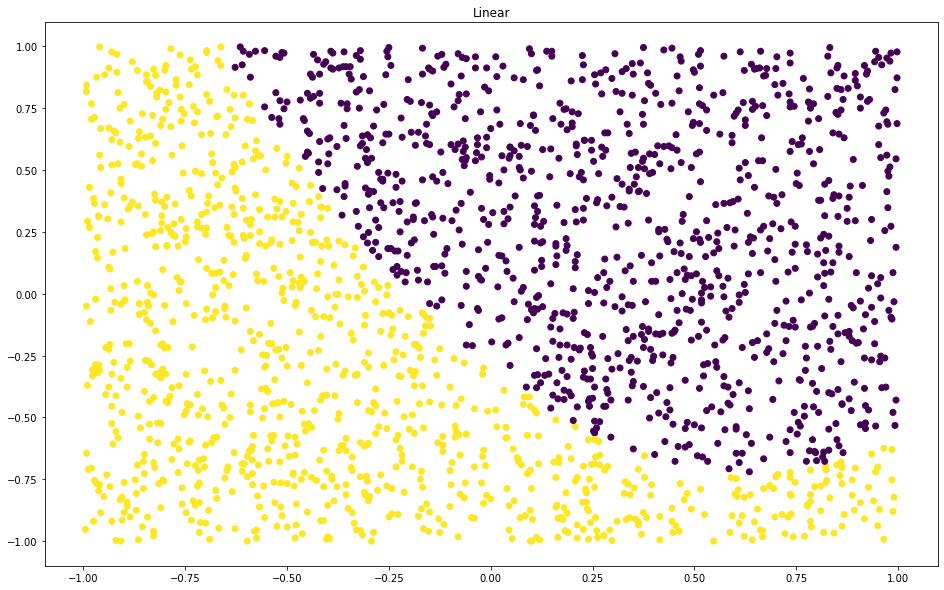

In [5]:
viz_2d(X_lin, Y_lin, 'Linear')

In [18]:
class NonLin(torch.nn.Module):

    def __init__(self):
        
        super().__init__()
        self.d1 = torch.nn.Linear(2, 10)
        self.d3 = torch.nn.Linear(10, 1)
    
    def forward(self, x):
        x = F.sigmoid(self.d1(x))
        x = self.d3(x)
        return x

In [19]:
m = NonLin()
lfn = torch.nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(m.parameters(), lr=1)

X = X_lin
Y = Y_lin

In [20]:

# fig = plt.figure(figsize = (10,4))
# ax1 = fig.add_subplot(111)
# # xlim = (-1,2, 1.2)
# ylim = (-1, 14)
# ax1.set_xlim(-1.2, 1.2)
# ax1.set_ylim(-1, 14)
losses = []
continue_for = 0


# our dataset = X, Y

for e in range(20000):

    opt.zero_grad() 
    
        
    # Lets sample a batch
    Xrange = torch.randint(0, n_samples, (20, ))
    _X = X[Xrange]
    _Y = Y[Xrange]
    Y_pred = m(_X)
    
    # Calculate Loss
    loss = lfn(Y_pred, _Y.unsqueeze(-1))
    loss.backward()   
    losses.append(loss.item())
    
    opt.step()
#     display.clear_output(wait =True)    

    
    if continue_for == 0:
        print(f"{e:5}: {loss.item():.5f}")

        cmd = input('$: ')
        if cmd.lower().strip() in ['quit', 'q', 'exit', 'stop']:

                break
        else:
            try:
                continue_for = max(0, int(cmd.lower().strip()))
            except ValueError:
                ...
    else:
        continue_for -= 1
    
    
    if loss.item() < 0.001:
        print(f"{e:5}: {loss.item():.5f}")

        print(f'Model fully converged at {e}. Stopping.')
        break


    0: 0.70187
$: 
    1: 1.75359
$: 1000
 1002: 0.00445
$: 1000
 2003: 0.00142
$: 1000
 3004: 0.00132
$: 1000
 3394: 0.00100
Model fully converged at 3394. Stopping.


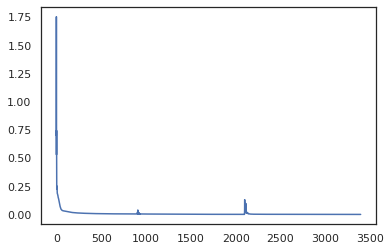

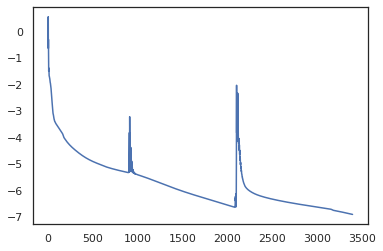

In [21]:


plt.plot(losses)
plt.show()
plt.plot(torch.log(torch.tensor(losses)))
plt.show()

/home/priyansh/Dev/perm/conda/envs/main/lib/python3.8/site-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


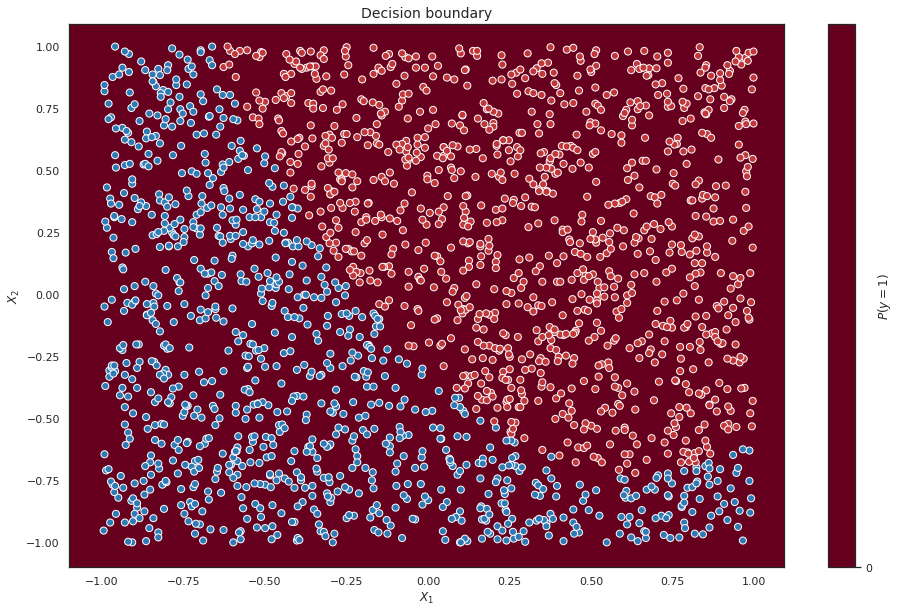

In [17]:
viz_all(model=m, X=X, Y=Y)